# Production quality
Il dataset in questione riguarda una macchina composta da 5 camere di dimensioni uguali, ciascuna delle quali è dotata di 3 sensori di temperatura. Oltre ai dati di temperatura, sono stati raccolti anche informazioni sull'altezza dello strato di materia prima e sul suo contenuto di umidità. Questi valori vengono misurati all'ingresso della macchina quando la materia prima viene introdotta e il processo di tostatura dura un'ora.

La qualità dei prodotti viene valutata attraverso campioni prelevati in laboratorio ogni ora. I dati relativi alle analisi dei campioni sono contenuti nel file "data_Y.csv". Ogni campione è preso all'uscita della macchina di tostatura e contiene informazioni sull'ora del campionamento.

L'obiettivo del progetto è costruire un modello in grado di determinare la qualità dei prodotti in base ai dati che arrivano ogni minuto. La valutazione del modello sarà basata sull'indicatore MAE (Mean Absolute Error). 



In [1]:
import pandas as pd

#col_name = ["s1","c1","s2","c2","s3","c3","s4","c4","s5","c5","class"]
X_ = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\data_X.csv")
y_ = pd.read_csv("C:\\Users\\andrea\\Desktop\\Progetto FAD\\data_Y.csv")

In [2]:
print(len(X_))
print(len(y_))


2103841
29184


In [3]:
X_.head()

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [3]:
dataset = pd.merge(X_, y_, on='date_time', how="inner")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29184 entries, 0 to 29183
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_time   29184 non-null  object 
 1   T_data_1_1  29184 non-null  int64  
 2   T_data_1_2  29184 non-null  int64  
 3   T_data_1_3  29184 non-null  int64  
 4   T_data_2_1  29184 non-null  int64  
 5   T_data_2_2  29184 non-null  int64  
 6   T_data_2_3  29184 non-null  int64  
 7   T_data_3_1  29184 non-null  int64  
 8   T_data_3_2  29184 non-null  int64  
 9   T_data_3_3  29184 non-null  int64  
 10  T_data_4_1  29184 non-null  int64  
 11  T_data_4_2  29184 non-null  int64  
 12  T_data_4_3  29184 non-null  int64  
 13  T_data_5_1  29184 non-null  int64  
 14  T_data_5_2  29184 non-null  int64  
 15  T_data_5_3  29184 non-null  int64  
 16  H_data      29184 non-null  float64
 17  AH_data     29184 non-null  float64
 18  quality     29184 non-null  int64  
dtypes: float64(2), int64(16),

Utilizzando il  metodo .info() vediamo le informazioni su un DataFrame inclusi l'indice dtype, le colonne, i valori non nulli e l'utilizzo della memoria. Viene effettuato un ulteriore controllo per verificare la presenza di eventuali valori NaN. <br>
Come si può notare non ci sono valori NaN e dunque non è necessario effettuare ulteriori operazioni. <br>
Per ogni features verranno calcolati i descrittori statistici più  significativi al fine di individuare eventuali valori mancanti o anomali.

In [4]:
stats = dataset.describe().apply(lambda s: s.apply('{0:.2f}'.format))
stats

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
count,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00,29184.00
mean,250.03,249.81,250.15,349.80,349.72,349.95,501.16,500.92,501.32,348.96,348.95,349.67,249.80,249.67,249.85,174.75,7.50,402.80
std,32.35,30.45,30.64,43.75,41.41,38.02,62.42,64.63,61.48,38.76,40.17,39.73,30.78,30.55,30.63,14.40,1.15,46.27
min,-193.00,-120.00,-96.00,-703.00,-914.00,-186.00,-591.00,-759.00,-441.00,-441.00,-446.00,-594.00,-82.00,-106.00,-128.00,145.00,3.12,221.00
25%,228.00,228.00,229.00,328.00,328.00,328.00,464.00,463.00,464.00,327.00,327.00,327.00,229.00,229.00,228.00,162.46,6.73,372.00
50%,250.00,250.00,250.00,350.00,350.00,350.00,502.00,502.00,502.00,349.00,349.00,350.00,250.00,250.00,250.00,174.40,7.51,408.00
75%,272.00,271.00,272.00,372.00,372.00,372.00,538.00,537.00,539.00,371.00,371.00,371.00,271.00,271.00,271.00,186.98,8.28,439.00
max,722.00,564.00,643.00,1299.00,1178.00,886.00,1491.00,2492.00,1294.00,1136.00,1204.00,944.00,879.00,737.00,619.00,206.68,11.62,505.00


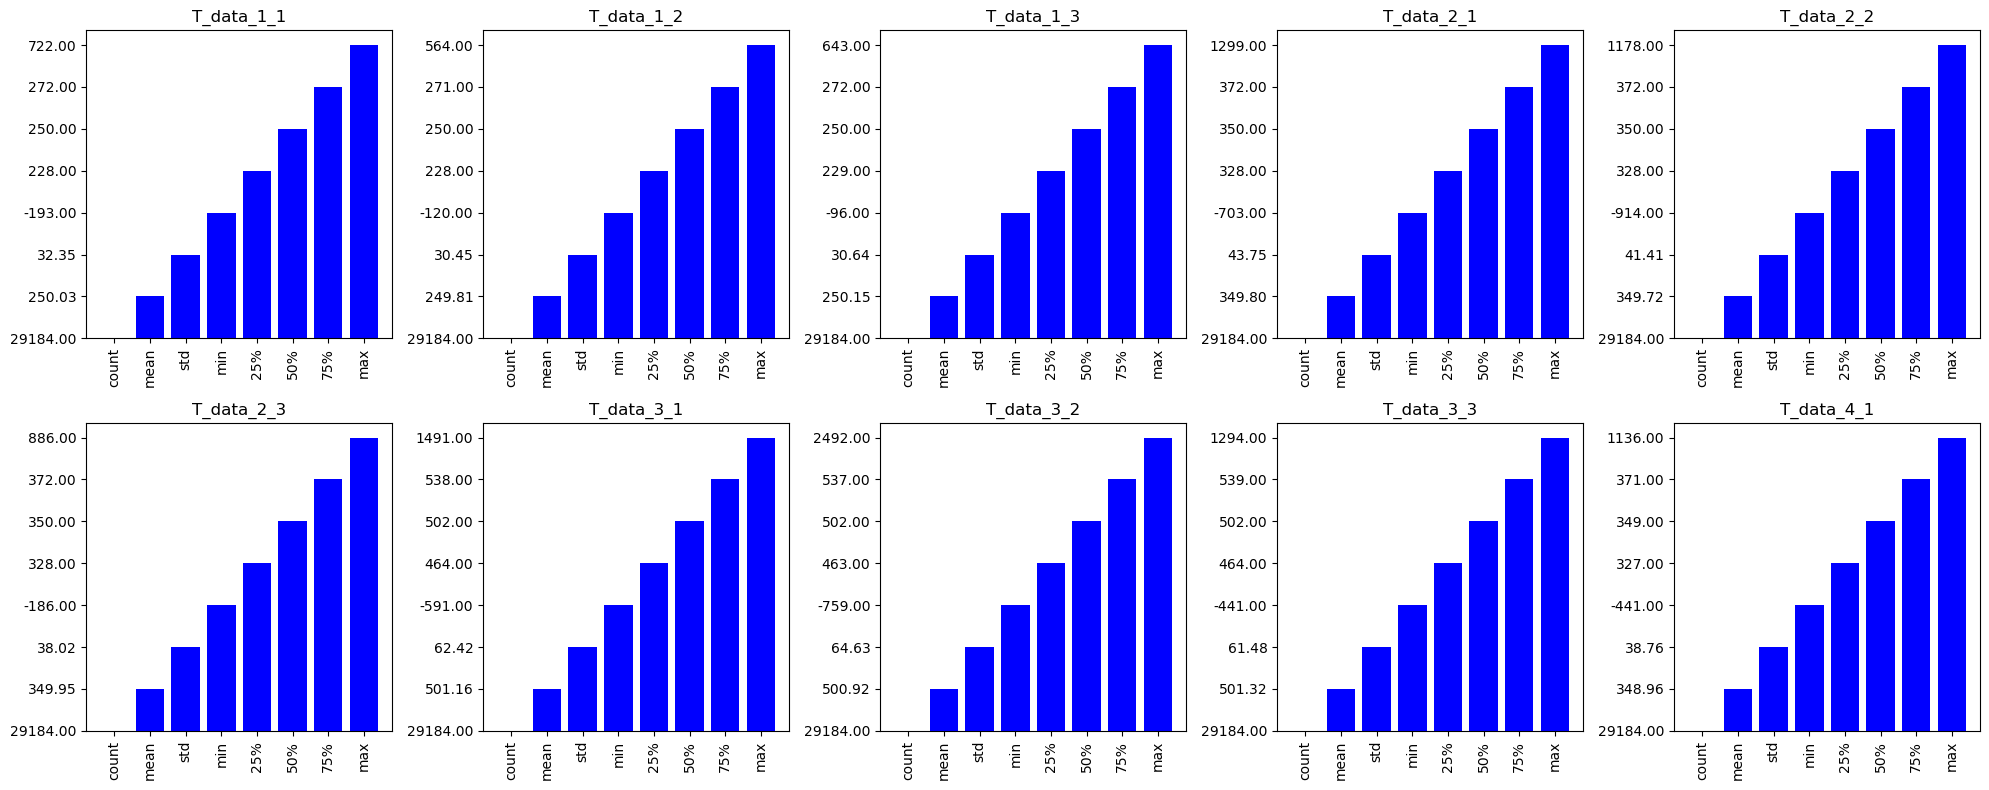

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    axs[i//5, i%5].bar(stats.index.values, stats[stats.columns[i]], color='b')
    axs[i//5, i%5].set_title(stats.columns[i])
    axs[i//5, i%5].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Di seguito viene creato un istogramma della distribuzione della variabile 'quality' nel dataset. La curva di densità stimata, rappresentata dalla linea continua, è una stima della distribuzione normale che meglio si adatta ai dati. I parametri <b>$\mu$ (media) e $\sigma$ (deviazione standard)</b> della distribuzione stimata sono mostrati nella legenda del grafico. Questa visualizzazione fornisce un'idea della distribuzione dei valori di <b>'quality' </b>nel dataset."

<Axes: xlabel='quality', ylabel='Count'>

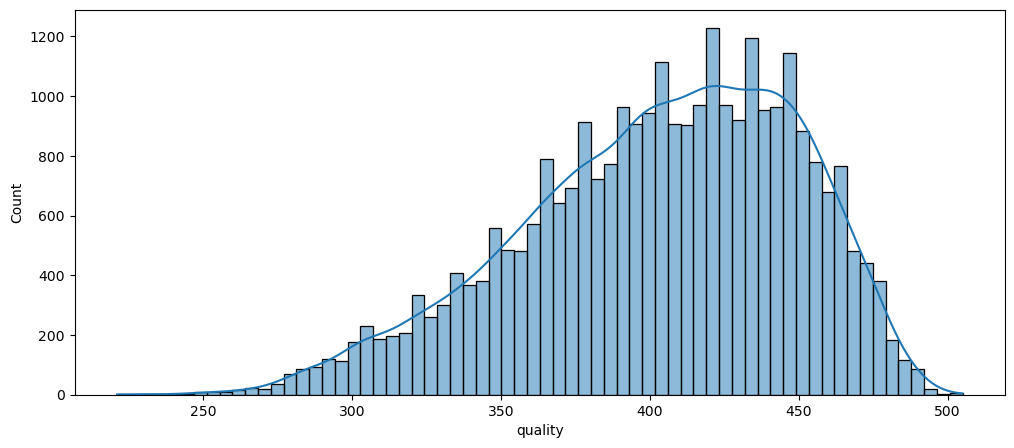

In [6]:
import seaborn as sns
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(dataset['quality'], kde=True, ax=ax)


In [8]:
corr_matrix = dataset.corr("pearson")
corr_matrix

C:\Users\andrea\AppData\Local\Temp\ipykernel_17984\1824650672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr("pearson")


,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
T_data_1_1,1.000000,0.659668,0.649625,-0.005235,0.000708,0.000122,-0.010778,-0.007205,-0.009579,0.000628,-0.016972,-0.005507,-0.005560,-0.006180,-0.015449,-0.019331,-0.001418,0.153267
T_data_1_2,0.659668,1.000000,0.690438,0.008710,0.009286,0.011731,-0.002342,-0.013459,-0.011845,-0.001686,-0.020158,-0.007527,-0.014022,-0.018872,-0.023108,-0.017738,-0.000291,0.164457
T_data_1_3,0.649625,0.690438,1.000000,0.002835,0.007235,0.011749,-0.006373,-0.007384,-0.010108,0.005209,-0.003454,0.000794,-0.021769,-0.030411,-0.035314,-0.012020,-0.002702,0.158180
T_data_2_1,-0.005235,0.008710,0.002835,1.000000,0.355370,0.389946,-0.010062,-0.007176,-0.004971,0.021294,0.010942,0.025101,0.002258,-0.009570,-0.003175,-0.001611,-0.001315,0.067828
T_data_2_2,0.000708,0.009286,0.007235,0.355370,1.000000,0.404360,-0.023292,-0.000592,-0.017482,0.008122,-0.005910,0.014449,0.010317,0.008459,0.008991,0.013029,0.002594,0.090381
T_data_2_3,0.000122,0.011731,0.011749,0.389946,0.404360,1.000000,-0.000805,-0.000372,0.001864,0.010093,0.006046,0.013371,0.010390,-0.000028,0.011401,0.008324,0.002564,0.080672
T_data_3_1,-0.010778,-0.002342,-0.006373,-0.010062,-0.023292,-0.000805,1.000000,0.527216,0.558841,-0.025132,-0.025089,-0.015367,0.007238,0.008074,0.003190,0.018755,-0.005755,-0.663269
T_data_3_2,-0.007205,-0.013459,-0.007384,-0.007176,-0.000592,-0.000372,0.527216,1.000000,0.540306,-0.018672,-0.031407,-0.019870,0.005811,0.001764,0.008637,0.013194,0.001493,-0.644903
T_data_3_3,-0.009579,-0.011845,-0.010108,-0.004971,-0.017482,0.001864,0.558841,0.540306,1.000000,-0.010582,-0.012529,-0.011642,-0.009149,0.003999,-0.001516,0.010508,0.001088,-0.680933
T_data_4_1,0.000628,-0.001686,0.005209,0.021294,0.008122,0.010093,-0.025132,-0.018672,-0.010582,1.000000,0.414581,0.421842,-0.005767,-0.006066,0.001401,-0.011916,0.000479,0.017779


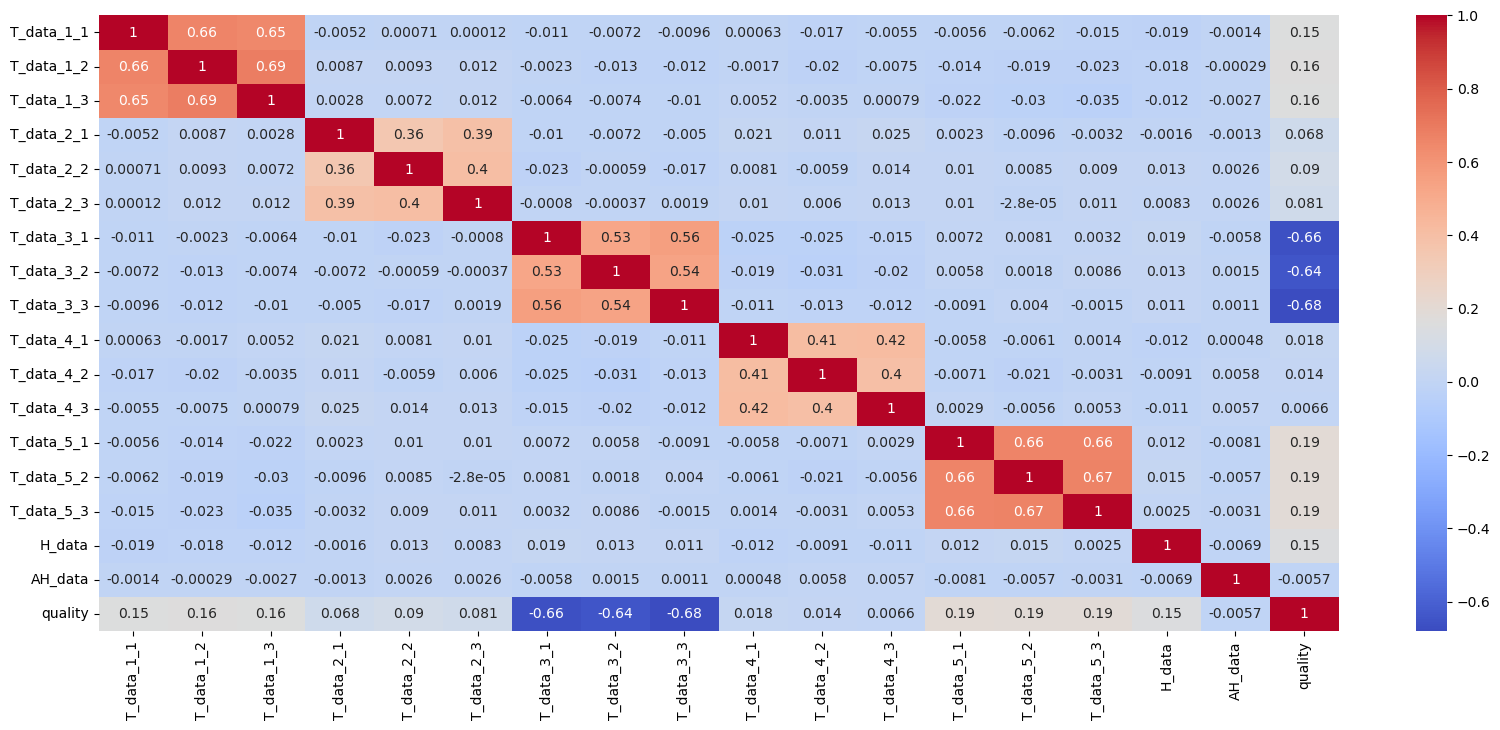

In [9]:
fig = plt.figure(figsize = (20, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

# Regressione

Nel seguente capitolo saranno utilizzati algoritmi di regressione al fine di predire la variabile "quality" a partire da tutti gli altri dati, il task risulta particolarmente utile data la  correlazione presente tra i sensori della stessa camera.

In [10]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(dataset, test_size=0.33, random_state=42)

In [11]:
train

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
8576,2015-12-27 08:05:00,257,237,258,338,225,311,556,552,564,357,355,341,212,213,217,192.32,9.52,332
24781,2017-11-01 13:05:00,241,235,251,336,312,329,587,600,593,305,310,296,271,281,264,177.70,9.13,308
6065,2015-09-13 17:05:00,206,206,194,316,325,330,490,483,485,347,344,342,228,224,228,196.36,5.59,400
23858,2017-09-24 02:05:00,153,201,208,338,336,320,568,566,531,327,336,376,234,251,237,172.58,7.03,308
12980,2016-06-27 20:05:00,225,224,213,325,320,316,636,676,549,403,389,394,288,282,242,195.84,8.19,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,2017-06-20 23:05:00,233,253,248,368,388,365,305,470,486,410,344,321,268,311,264,177.92,9.49,429
5390,2015-08-16 14:05:00,250,403,276,348,335,338,488,523,483,330,308,334,256,262,254,152.33,8.51,425
860,2015-02-08 20:05:00,255,248,245,316,313,303,581,558,550,330,336,324,236,249,249,195.85,6.12,333
15795,2016-10-23 03:05:00,228,268,236,368,361,358,460,516,450,357,345,358,265,304,271,169.40,9.22,439


Di seguito viene definita la funzione model_trainer, utilizzata per effettuare il fit di un modello di regressione lineare e in automatico eliminare di volta in volta le variabili che hanno un P-value maggiore di 0.1, questo poichè si vuole raggiungere una confidenza elevata nella predizione.

La funzione model_trainer prende in input una formula di regressione (x) e una variabile target (y). Utilizza il metodo OLS per addestrare un modello sulla variabile target utilizzando la formula di regressione specificata. Successivamente, verifica se il valore p associato a ogni variabile esplicativa nel modello è maggiore di 0.1. Se una variabile ha un valore p maggiore di 0.1, viene rimossa dalla formula di regressione e il modello viene addestrato nuovamente. Questo processo viene ripetuto finché tutte le variabili esplicative nel modello hanno un valore p inferiore o uguale a 0.1. Alla fine, la funzione restituisce il modello addestrato e l'elenco delle variabili eliminate.

In [20]:
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols
import numpy as np


def model_trainer(x,y):
    #print(x)
    #print(y)
    removed_var=[]
    model=ols(y+"~"+x,train).fit()
    while(model.pvalues.drop("Intercept").max()>0.1):
        x=x.replace(model.pvalues.drop("Intercept").idxmax()+"+","")
        x=x.replace("+"+model.pvalues.drop("Intercept").idxmax(),"")
        removed_var.append(model.pvalues.drop("Intercept").idxmax())
        model=ols(y+"~"+x,train).fit()
    return model,removed_var

ind = 'T_data_1_1+T_data_1_2+T_data_1_3+T_data_2_1+T_data_2_2+T_data_2_3+T_data_3_1+T_data_3_2+T_data_3_3+T_data_4_1+T_data_4_2+T_data_4_3+T_data_5_1+T_data_5_2+T_data_5_3+H_data+AH_data'
dip='quality'

model,removed=model_trainer(ind,dip)
print("MAE Train: ",np.sqrt(mean_absolute_error(train['quality'], model.predict(train))))
print("MAE Test: ",np.sqrt(mean_absolute_error(test['quality'], model.predict(test))))
print("Features eliminate : ",removed)
print(model.summary())

MAE Train:  3.9388180138272575
MAE Test:  3.9597205451142137
Features eliminate :  ['AH_data', 'T_data_4_1']
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3914.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:16:38   Log-Likelihood:                -89135.
No. Observations:               19553   AIC:                         1.783e+05
Df Residuals:                   19537   BIC:                         1.784e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Per provare ad ottenere prestazioni migliori si è tentato un approccio tramite Ridge Regression sulle variabili piu correlate, limitando la magnitudo dei coefficienti si potrebbe ottenere una regressione più accurata.

In [16]:
ind = 'T_data_1_1+T_data_1_2+T_data_1_3+T_data_2_1+T_data_2_2+T_data_2_3+T_data_3_1+T_data_3_2+T_data_3_3+T_data_4_2+T_data_4_3+T_data_5_1+T_data_5_2+T_data_5_3+H_data'
dip='quality'

#model,removed=model_trainer(ind,dip)
model=ols(dip+"~"+ind,train).fit_regularized(alpha=1.0, L1_wt=0.0)
print("MAE Train: ",np.sqrt(mean_absolute_error(train['quality'], model.predict(train))))
print("MAE Test: ",np.sqrt(mean_absolute_error(test['quality'], model.predict(test))))



MAE Train:  4.716792997989456
MAE Test:  4.682247170583697


Purtroppo non si hanno miglioramenti rispetto la regressione lineare.

## Predizione valore di un sensore rispetto gli altri due per ogni camera

In [19]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Definisci il numero totale di telecamere
num_camere = 5  # Sostituisci con il numero corretto di telecamere nel tuo dataset

for i in range(1, num_camere+1):
    # Divide il dataset in feature (input) e target (output) per la camera i-esima
    X = dataset[['T_data_{}_1'.format(i), 'T_data_{}_2'.format(i)]]
    y = dataset['T_data_{}_3'.format(i)]

    # Crea un'istanza del modello di regressione lineare
    model = LinearRegression()

    # Addestra il modello sui dati
    model.fit(X, y)

    # Esegui le predizioni per la camera i-esima
    predictions = model.predict(X)

    # Calcola il MAE e MSE per la camera i-esima
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    # Stampa i risultati delle predizioni
    print(f"Risultati per camera {i}:")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")
    print("-----------------------")
    
    

Risultati per camera 1:
MAE: 11.452397123840177
R^2: 0.5434499089909839
-----------------------
Risultati per camera 2:
MAE: 18.894255505399865
R^2: 0.2329105758832959
-----------------------
Risultati per camera 3:
MAE: 25.86240515117443
R^2: 0.39589504366748995
-----------------------
Risultati per camera 4:
MAE: 18.385195353680338
R^2: 0.2401071834580788
-----------------------
Risultati per camera 5:
MAE: 11.319636576418281
R^2: 0.5326166123264788
-----------------------


Risultati per camera 1:

MAE: 11.452397123840177
R^2: 0.5434499089909839
Il modello per la camera 1 ha un MAE di 11.45, che rappresenta l'errore medio assoluto tra le previsioni e i valori effettivi. Un valore di R^2 di 0.54 indica che il modello è in grado di spiegare circa il 54% della varianza presente nei dati. Questi risultati suggeriscono che il modello ha una buona capacità di predire la qualità del sensore 3 per la camera 1.

Risultati per camera 2:

MAE: 18.894255505399865
R^2: 0.2329105758832959
Per la camera 2, il MAE è di 18.89, il che indica un errore medio assoluto più elevato rispetto alla camera 1. L'R^2 di 0.23 suggerisce che il modello spiega solo circa il 23% della varianza presente nei dati. Questi risultati indicano che il modello potrebbe avere una performance inferiore nella previsione del sensore 3 per la camera 2.

Risultati per camera 3:

MAE: 25.86240515117443
R^2: 0.39589504366748995
Per la camera 3, l'MAE è di 25.86, indicando un errore medio assoluto più elevato rispetto alle camere precedenti. Tuttavia, l'R^2 di 0.40 indica che il modello riesce a spiegare circa il 40% della varianza nei dati per questa camera. Sebbene l'errore sia più alto, il modello mostra una relativa capacità di previsione per il sensore 3 della camera 3.

Risultati per camera 4:

MAE: 18.385195353680338
R^2: 0.2401071834580788
Per la camera 4, l'MAE è di 18.39, indicando un errore medio assoluto simile alla camera 2. L'R^2 di 0.24 indica che il modello spiega solo circa il 24% della varianza presente nei dati per questa camera. Questi risultati suggeriscono che il modello potrebbe avere una performance limitata nella previsione del sensore 3 per la camera 4.

Risultati per camera 5:

MAE: 11.319636576418281
R^2: 0.5326166123264788
Infine, per la camera 5, l'MAE è di 11.32, indicando un errore medio assoluto simile alla camera 1. L'R^2 di 0.53 indica che il modello spiega circa il 53% della varianza nei dati per questa camera. Questi risultati suggeriscono che il modello ha una buona capacità di predire la qualità del sensore 3 per la camera 5.

In generale, i risultati mostrano che la performance del modello varia tra le diverse camere, con alcune camere che ottengono un migliore adattamento dei dati rispetto ad altre. Sarebbe consigliabile esaminare ulteriormente le camere con performance inferiori per identificare eventuali fattori o caratteristiche specifiche che potrebbero influenzare la capacità di predizione del modello.




